In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay

# Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam;

In [2]:
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.drop(["id", "date", "zipcode"], axis= 1, inplace= True)

In [4]:
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
dtypes: flo

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141767,367127.196483,75000.0000,321950.000,450000.0000,645000.000,7.700000e+06
bedrooms,21613.0,3.370842,0.930062,0.0000,3.000,3.0000,4.000,3.300000e+01
bathrooms,21613.0,2.114757,0.770163,0.0000,1.750,2.2500,2.500,8.000000e+00
sqft_living,21613.0,2079.899736,918.440897,290.0000,1427.000,1910.0000,2550.000,1.354000e+04
sqft_lot,21613.0,15106.967566,41420.511515,520.0000,5040.000,7618.0000,10688.000,1.651359e+06
floors,21613.0,1.494309,0.539989,1.0000,1.000,1.5000,2.000,3.500000e+00
waterfront,21613.0,0.007542,0.086517,0.0000,0.000,0.0000,0.000,1.000000e+00
view,21613.0,0.234303,0.766318,0.0000,0.000,0.0000,0.000,4.000000e+00
condition,21613.0,3.409430,0.650743,1.0000,3.000,3.0000,4.000,5.000000e+00
grade,21613.0,7.656873,1.175459,1.0000,7.000,7.0000,8.000,1.300000e+01


<Axes: >

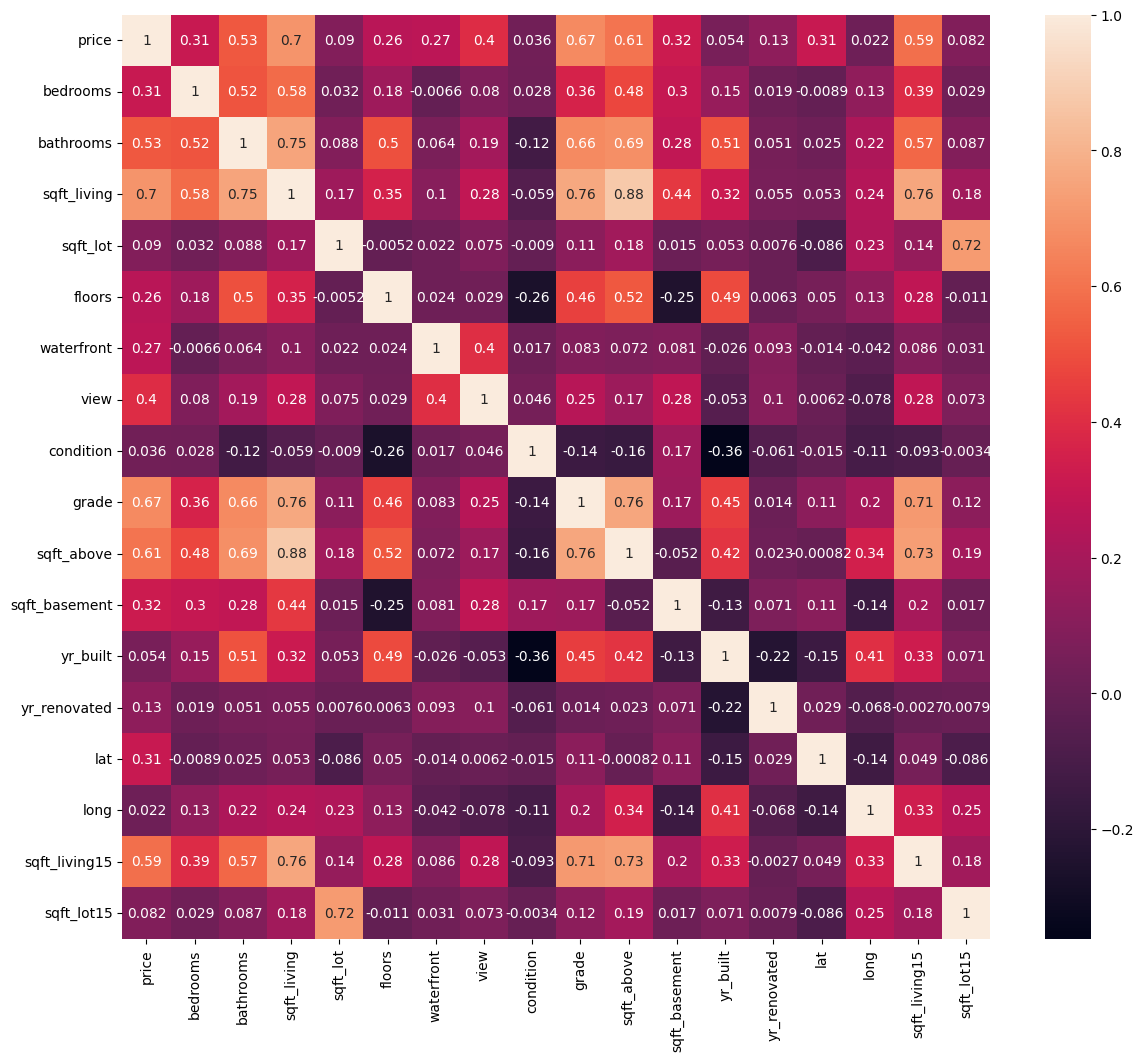

In [7]:
plt.figure(figsize=(14, 12), dpi=100)
sns.heatmap(df.corr(), annot= True)

In [8]:
price_corr = df.corr()['price'].sort_values(ascending=False)
print(price_corr)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
Name: price, dtype: float64


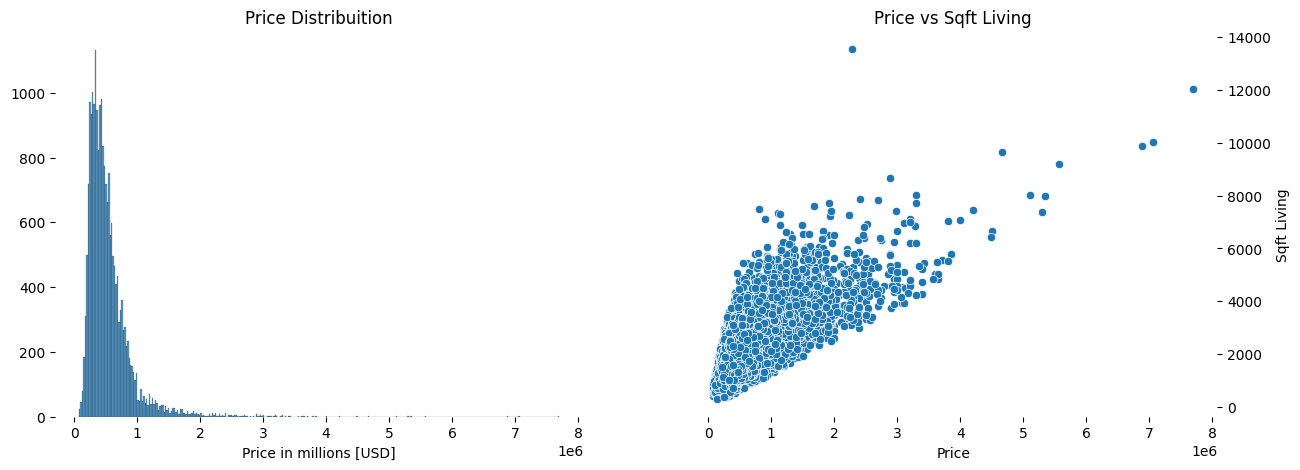

In [9]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

sns.histplot(df['price'], ax=axes[0])
sns.scatterplot(x='price',y='sqft_living', data=df, ax=axes[1])
sns.despine(bottom=True, left=True)

axes[0].set(xlabel='Price in millions [USD]', ylabel='', title='Price Distribuition')
axes[1].set(xlabel='Price', ylabel='Sqft Living', title='Price vs Sqft Living')

axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

In [10]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


#### **X and y**

In [11]:
X = df.drop("price", axis=1)
y = df["price"]

#### train test split

In [12]:
len(df)

21613

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

##### Scaler

In [14]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **Creating Model**

In [15]:
model = Sequential()

# Input Layer
model.add(Dense(32,activation='relu'))

# Hidden Layers
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))

model.add(Dense(1))

In [16]:
model.compile(optimizer="adam", loss="mse")

In [17]:
history = model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=100)

Epoch 1/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 418543435776.0000 - val_loss: 433271308288.0000
Epoch 2/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 406273064960.0000 - val_loss: 265718595584.0000
Epoch 3/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 179048284160.0000 - val_loss: 95636217856.0000
Epoch 4/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 89715851264.0000 - val_loss: 91630133248.0000
Epoch 5/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 91342012416.0000 - val_loss: 87625342976.0000
Epoch 6/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 79955222528.0000 - val_loss: 83173548032.0000
Epoch 7/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 75130953728.0000 - val_loss: 78665949184.0000
Epoch 8/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 79775301632.0000 - val_loss: 74147069952.0000
Epoch 9/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 71696556032.0000 - val_loss: 68998381568.0000
Epoch 10/100
136/136 ━━━━━━━━━━━

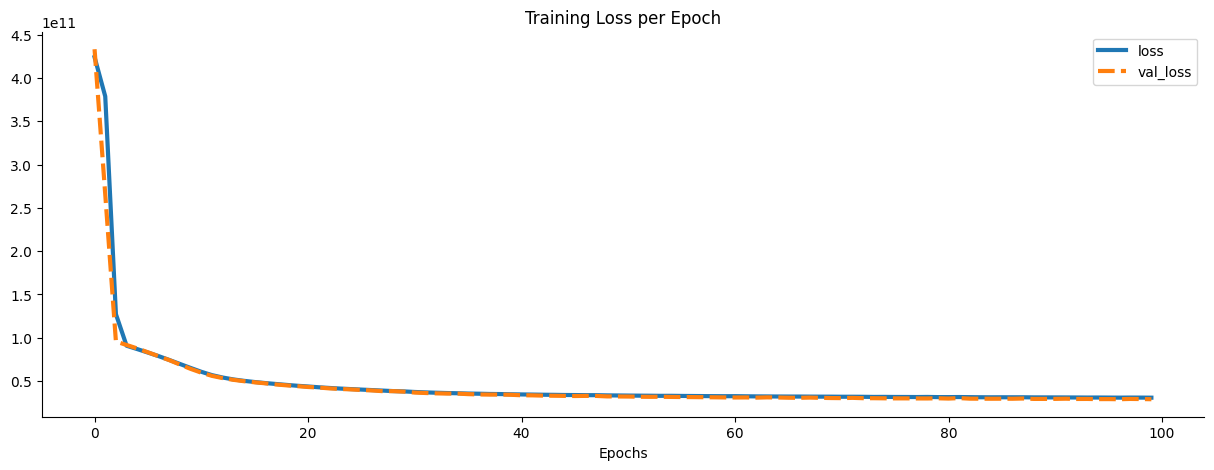

In [18]:
losses = pd.DataFrame(model.history.history)

plt.figure(figsize=(15,5))
sns.lineplot(data=losses,lw=3)
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
sns.despine()

In [19]:
predictions = model.predict(X_test)

print('MAE: ',mean_absolute_error(y_test,predictions))
print('MSE: ',mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,predictions)))
print('Variance Score: ',explained_variance_score(y_test,predictions))

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
MAE:  106183.51257400459
MSE:  28993862454.942417
RMSE:  170275.8422529233
Variance Score:  0.7930188251500694


In [20]:
# New House
single_house = df.drop('price',axis=1).iloc[0]
print(f'Features of new house:\n{single_house}')

single_house = scaler.transform(single_house.values.reshape(-1, 17))

print('\nPrediction Price:',model.predict(single_house)[0,0])

print('\nOriginal Price:',df.iloc[0]['price'])

Features of new house:
bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
Name: 0, dtype: float64
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step

Prediction Price: 290897.03

Original Price: 221900.0


C:\Users\himme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
